# Optimization Using Gradient Descent: Linear Regression

In this assignment, you will build a simple linear regression model to  predict Amazom price based on List price, weight and NumPages. You will use `Scikit-Learn` linear regression model, as well as construct and optimize the sum of squares cost function with gradient descent from scratch.

## Packages

Load the required packages:

In [ ]:
import numpy as np
# A library for programmatic plot generation.
import matplotlib.pyplot as plt
# A library for data manipulation and analysis.
import pandas as pd
# LinearRegression from sklearn.
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


Use `pandas` function `pd.read_csv` to open the .csv file the from the `path`.

In [ ]:
data = pd.read_table("https://raw.githubusercontent.com/ywen2021/cpsc531/refs/heads/main/Data/tvmarketing.csv",delimiter =",")

In [ ]:
# Print some part of the dataset.
data.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


`pandas` has a function to make plots from the DataFrame fields. By default, matplotlib is used at the backend. Let's use it here:

<Axes: xlabel='TV', ylabel='Sales'>

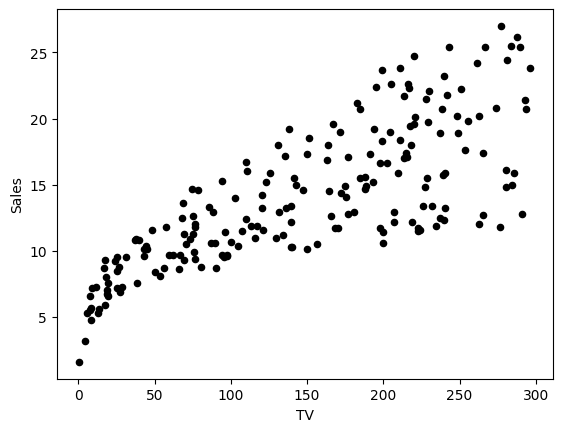

In [ ]:
data.plot(x='TV', y='Sales', kind='scatter', c='black')


In [ ]:
predictors = ["TV"]
outcome = ["Sales"]

#get rid of missing values
data = data.dropna()



<a name='2'></a>
## Linear Regression in Python with  `Scikit-Learn`

 **normalization**: substract the mean value of the array from each of the elements in the array and divide them by standard deviation (a statistical measure of the amount of dispersion of a set of values).

Normalization is not compulsory - gradient descent would work without it. But due to different units of `X` and `Y`, the cost function will be much steeper. Then you would need to take a significantly smaller learning rate , and the algorithm will require thousands of iterations to converge instead of a few dozens. Normalization helps to increase the efficiency of the gradient descent algorithm.

In [ ]:
# z score predictors
X = data[predictors].values
Y = data[outcome].values

X = (X - np.mean(X))/np.std(X)
Y = (Y - np.mean(Y))/np.std(Y)

`Scikit-Learn` is an open-source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities. `Scikit-learn` provides dozens of built-in machine learning algorithms and models, called **estimators**. Each estimator can be fitted to some data using its `fit` method. Full documentation can be found [here](https://scikit-learn.org/stable/).

Create an estimator object for a linear regression model:

In [ ]:
lr_sklearn = LinearRegression()

The estimator can learn from data calling the `fit` function. However, trying to run the following code you will get an error, as the data needs to be reshaped into 2D array:

In [ ]:
print(f"Shape of X array: {X.shape}")
print(f"Shape of Y array: {Y.shape}")

try:
    lr_sklearn.fit(X, Y)
except ValueError as err:
    print(err)

Shape of X array: (200, 1)
Shape of Y array: (200, 1)


Fit the linear regression model passing `X` and `Y` arrays into the function `lr_sklearn.fit`.

In [ ]:

lr_sklearn.fit(X, Y)


LinearRegression()

In [ ]:
##############################################
# print out table of coefficients
coef = pd.DataFrame({"Coef": lr_sklearn.coef_[0], "Names": predictors})
coef.loc[len(coef.index)] = [lr_sklearn.intercept_[0], "intercept"]
coef
##############################################


,Coef,Names
0,7.822244e-01,TV
1,-2.642827e-16,intercept


Another function is SGDRegressor, SGDRegressor is closer to the gradient descent that is covered in the course.
Stochastic Gradient Descent: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate).

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(alpha=0.001, max_iter=1000, tol=1e-4, random_state=42,penalty=None)
sgd.fit(X, Y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.001, penalty=None, random_state=42, tol=0.0001)

In [ ]:
coef = pd.DataFrame({"Coef": sgd.coef_, "Names": predictors})
coef.loc[len(coef.index)] = [sgd.intercept_[0], "intercept"]
coef

,Coef,Names
0,0.778942,TV
1,0.000029,intercept


In [ ]:
sgd.coef_

array([0.77894174])

##  Linear Regression using Gradient Descent (from scratch)

Functions to fit the models automatically are convenient to use, but for an in-depth understanding of the model and the maths behind it is good to implement an algorithm by yourself. Let's try to find linear regression coefficients $m$ and $b$, by minimising the difference between original values $y^{(i)}$ and predicted values $\hat{y}^{(i)}$ with the **loss function** $L\left(w, b\right)  = \frac{1}{2}\left(\hat{y}^{(i)} - y^{(i)}\right)^2$ for each of the training examples. Division by $2$ is taken just for scaling purposes, you will see the reason below, calculating partial derivatives.

To compare the resulting vector of the predictions $\hat{Y}$ with the vector $Y$ of original values $y^{(i)}$, you can take an average of the loss function values for each of the training examples:

$L (m,b) = \frac{1}{2n}\sum_{i=1}^{n} \left(\hat{y}^{(i)} - y^{(i)}\right)^2 =
\frac{1}{2n}\sum_{i=1}^{n} \left(mx^{(i)}+b - y^{(i)}\right)^2,\tag{1}$$

where $n$ is a number of data points. This function is called the sum of squares **cost function**. To use gradient descent algorithm, calculate partial derivatives as:

\begin{align}
\frac{\partial L }{ \partial m } &=
\frac{1}{n}\sum_{i=1}^{n} \left(mx^{(i)}+b - y^{(i)}\right)x^{(i)},\\
\frac{\partial L }{ \partial b } &=
\frac{1}{n}\sum_{i=1}^{n} \left(mx^{(i)}+b - y^{(i)}\right),
\tag{2}\end{align}

and update the parameters iteratively using the expressions

\begin{align}
m &= m - \alpha \frac{\partial L }{ \partial m },\\
b &= b - \alpha \frac{\partial L }{ \partial b },
\tag{3}\end{align}

where $\alpha$ is the learning rate.



Define cost function according to the equation $(1)$:

In [ ]:
def loss(m,b, X, Y):
    y_hat = X.dot(m) + b
    return 1/(2*len(Y))*np.sum((y_hat - Y.values)**2)

Define functions `gradient_m` and `gradient_b` to calculate partial derivatives according to the equations $(2)$. This can be done using vector form of the input data `X` and `Y`.

In [ ]:
def gradient_m(m, b, X, Y):
    ### START CODE HERE ###


    dm=
    ### END CODE HERE ###
    return(dm)



def gradient_b(m, b, X, Y):

    db
    ### END CODE HERE ###

    return(db)

Test your function, initiaze m as 0s, b=5.

In [ ]:
m=np.zeros((X.shape[1],), dtype=int).reshape(-1,1)
b=5

X=X.reshape(-1,X.shape[1])

print(gradient_m(m, b, X, Y))

In [ ]:
print(gradient_b(m, b, X, Y))

Implement gradient descent using expressions $(3)$:
\begin{align}
m &= m - \alpha \frac{\partial L }{ \partial m },\\
b &= b - \alpha \frac{\partial L }{ \partial b },
\end{align}

where $\alpha$ is the `learning_rate`.

In [ ]:
def gradient_descent( m, b, X, Y, learning_rate = 0.001, num_iterations = 1000, print_cost=False):
    for iteration in range(num_iterations):
        ### START CODE HERE ###
        m_new =
        b_new =
        ### END CODE HERE ###
        m = m_new
        b = b_new
        if print_cost:
            print (f"Cost after iteration {iteration}: {loss(m, b, X, Y)}")

    return m, b

In [ ]:
m_updated, b_updated=gradient_descent(m, b, X, Y, learning_rate = 0.1, num_iterations = 2000, print_cost=False)

In [ ]:
print("m_updated:",m_updated)
print("b_updated:", b_updated)

You should have gotten similar results as using scikit learn linear regression function.

Well done! Now you know how gradient descent algorithm can be applied to train a real model. Re-producing results manually for a simple case should give you extra confidence that you understand what happends under the hood of commonly used functions.